# Experiment 3

## Configuration

CW Matrix : `16 * 4`

2D Histogram : `8 * 8`

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("./data/results_16*4_winequality-white.csv", sep=";")
data.head(5)

,exp_name,mse_hist,mse_sketch
0,fixed acidity * volatile acidity,0.000054,757.477112
1,fixed acidity * volatile acidity,0.000000,8310.662109
2,fixed acidity * volatile acidity,0.000001,5848.205078
3,fixed acidity * volatile acidity,0.000000,0.040254
4,fixed acidity * volatile acidity,0.000000,10693.464844


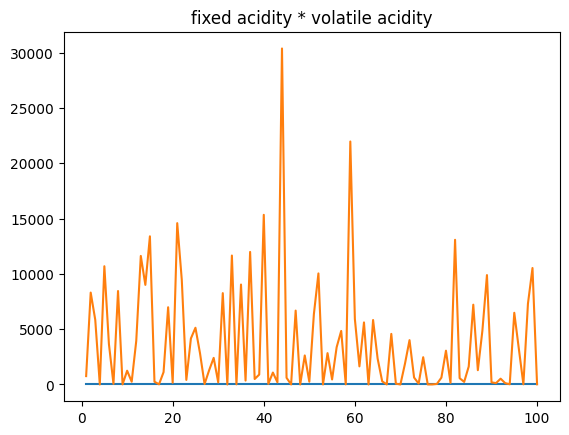

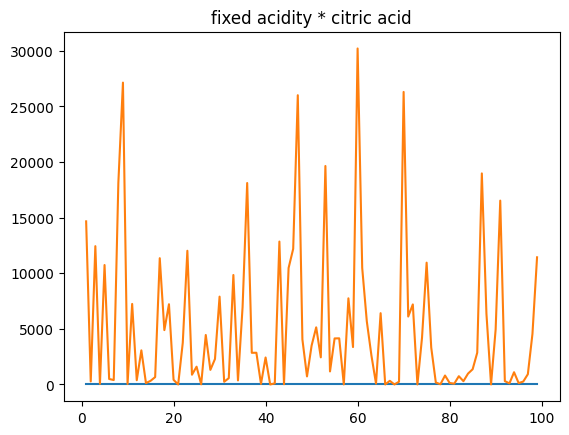

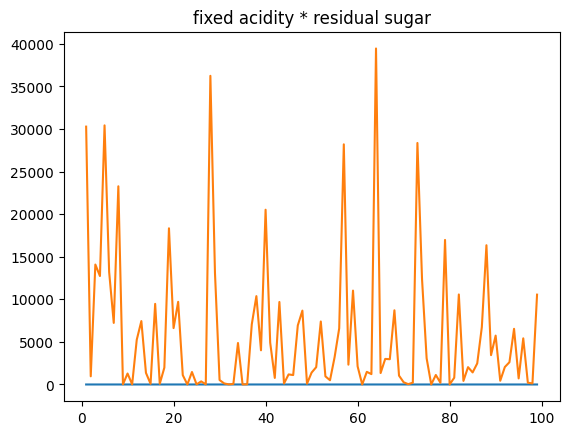

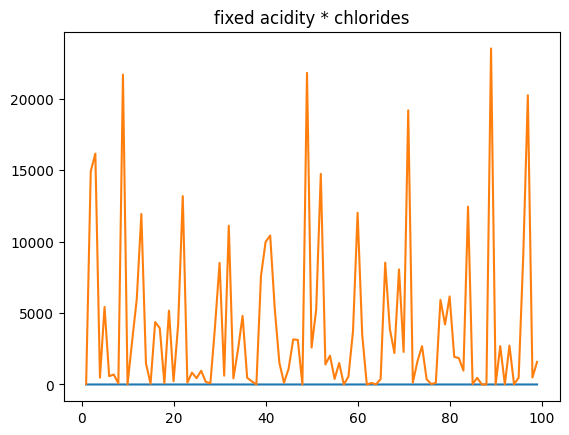

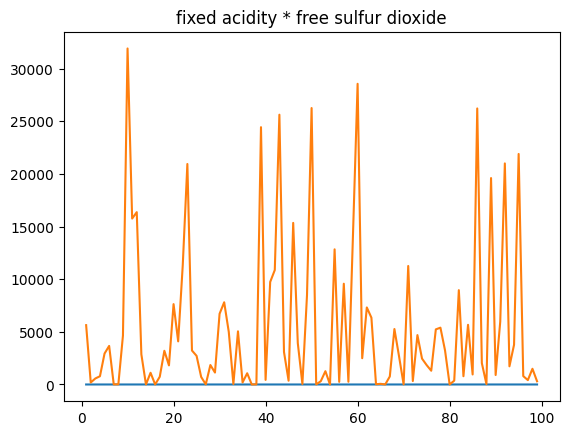

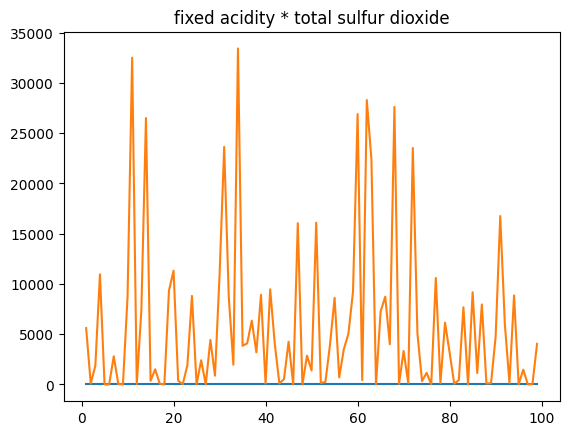

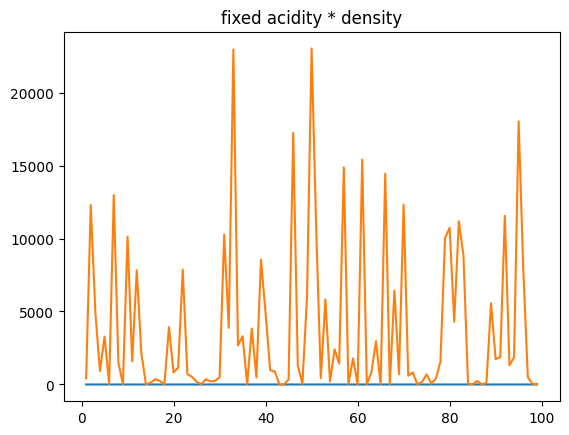

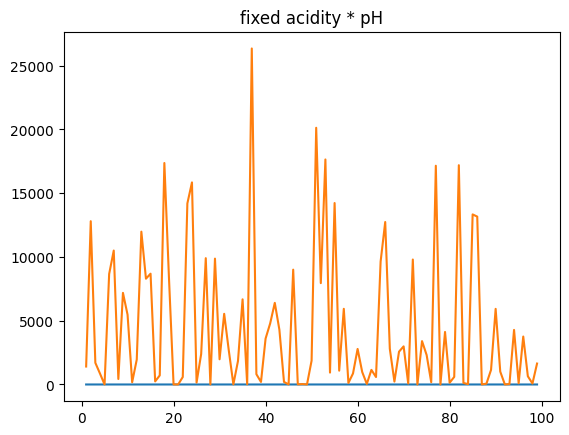

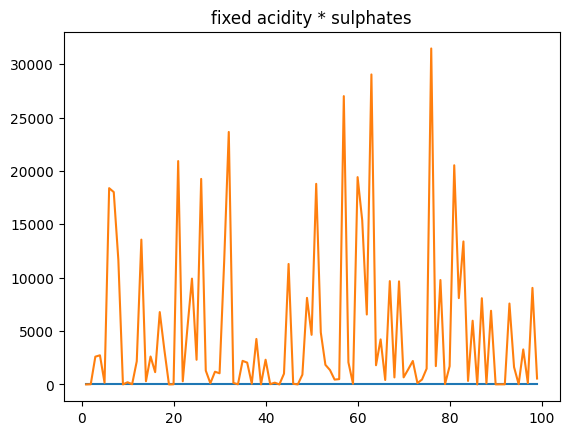

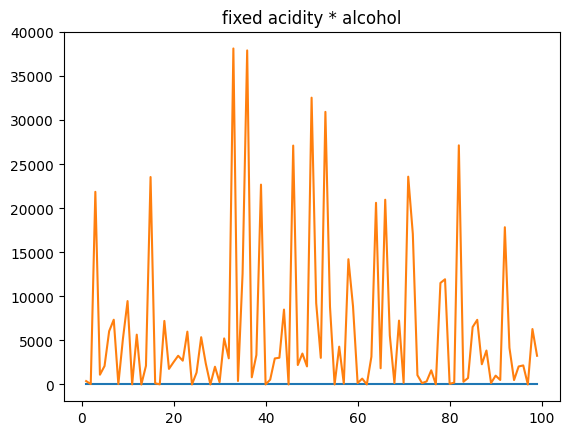

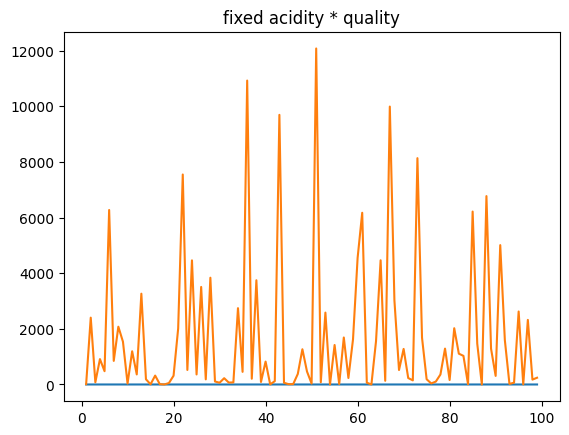

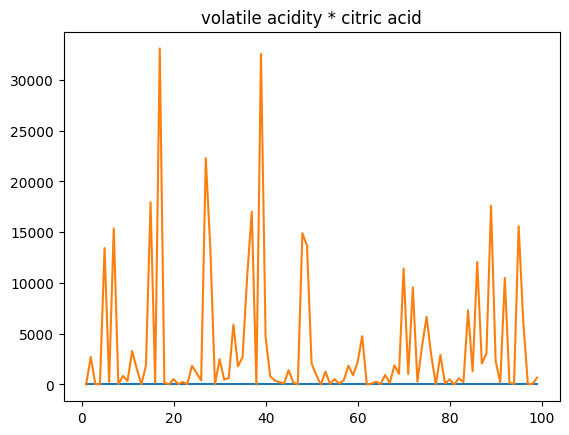

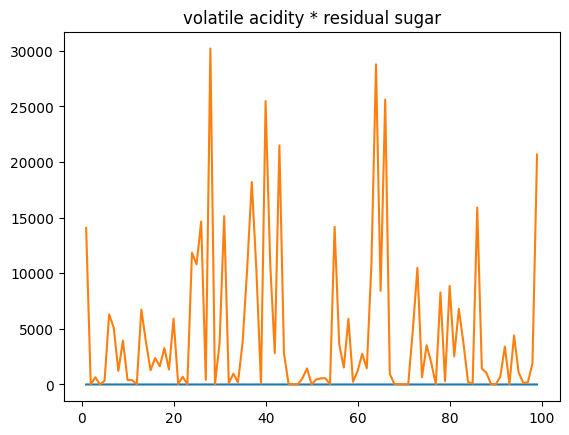

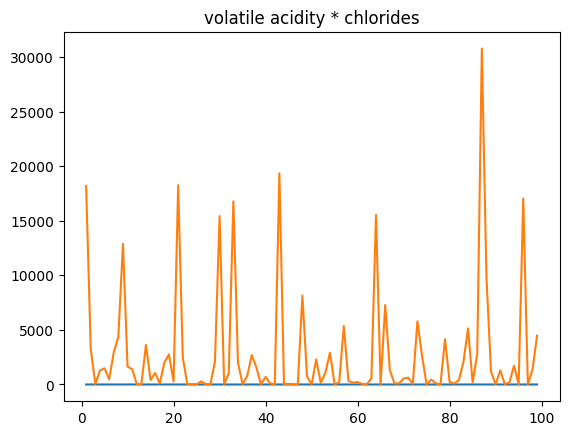

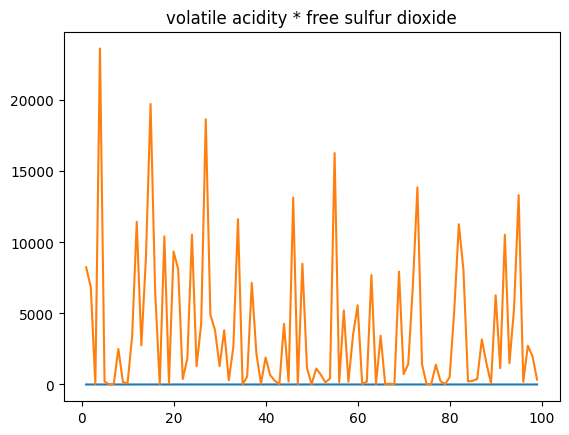

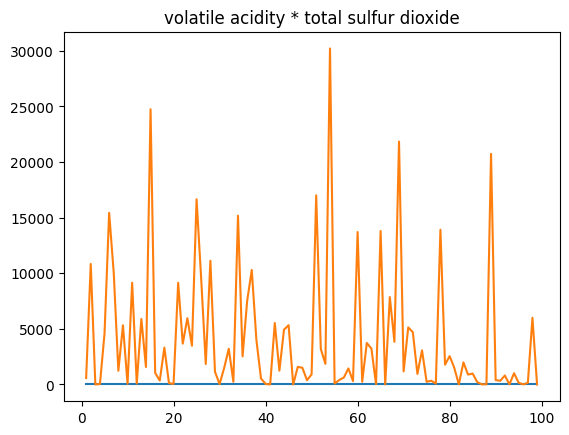

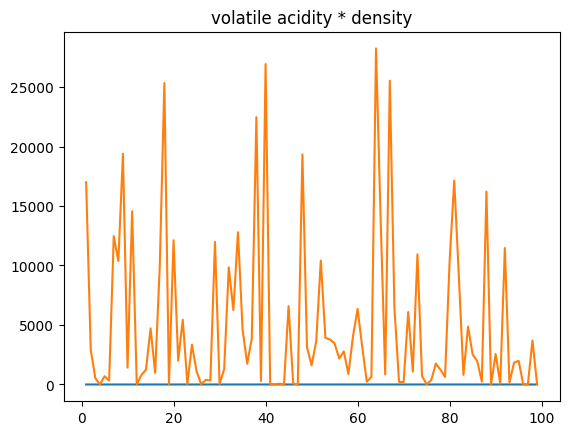

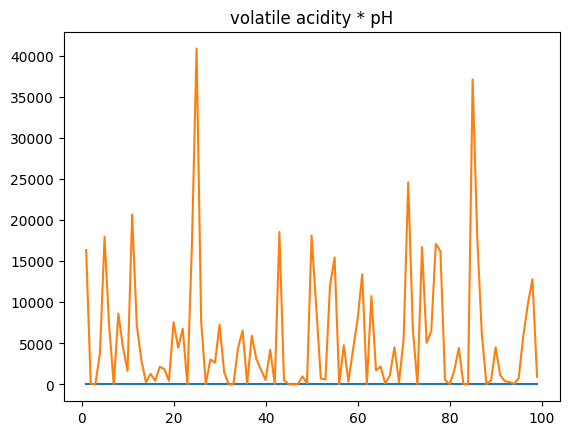

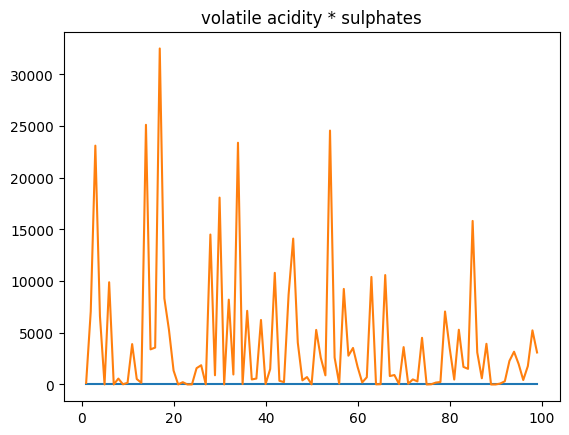

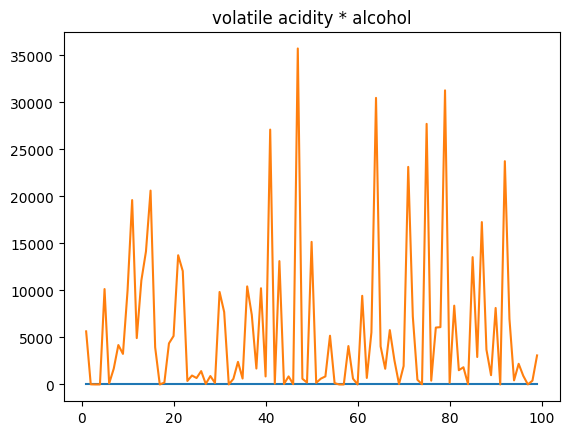

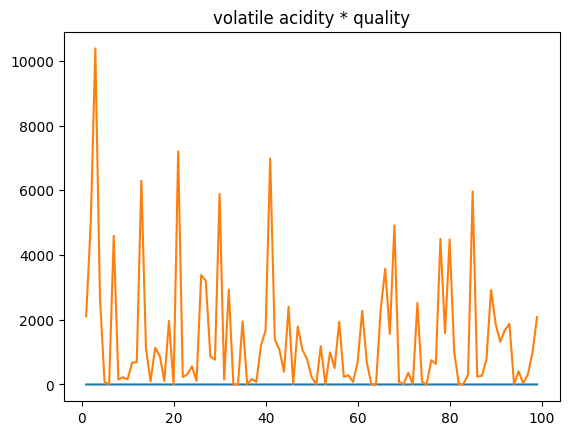

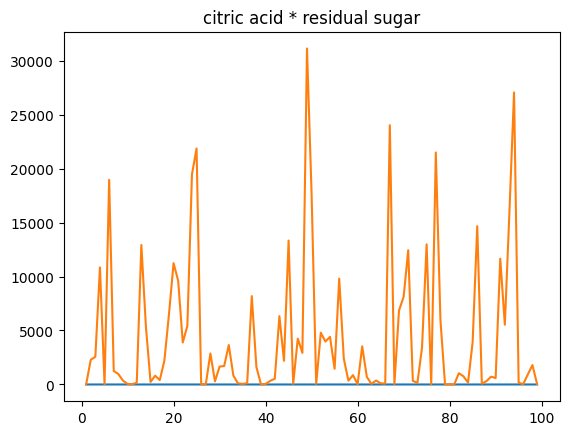

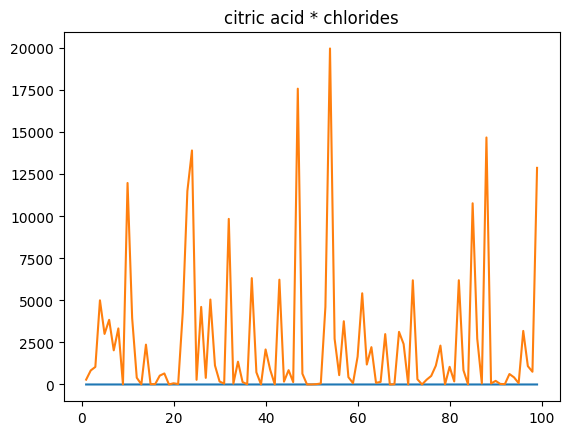

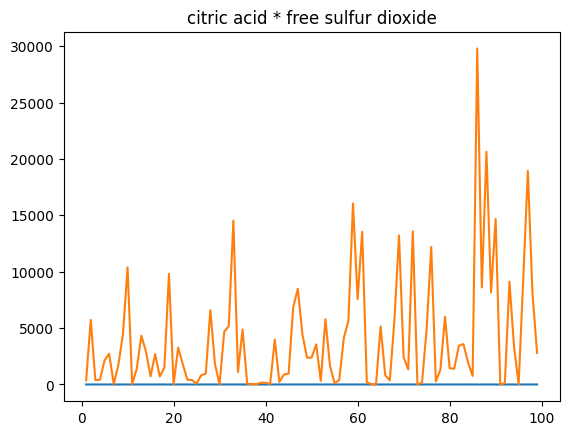

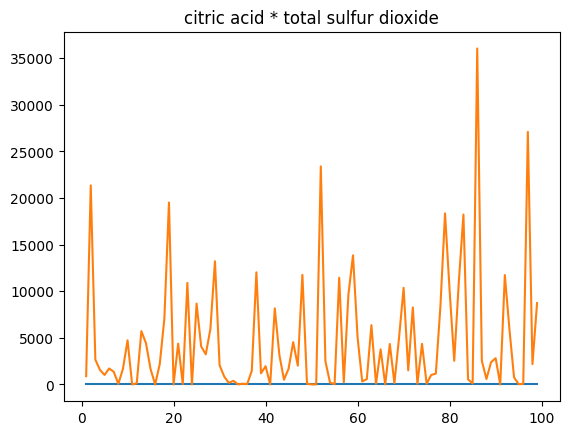

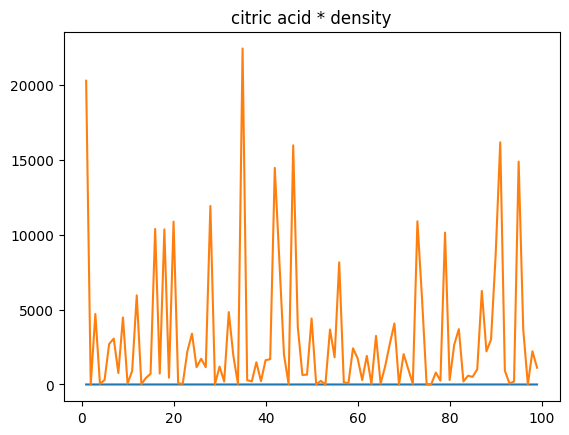

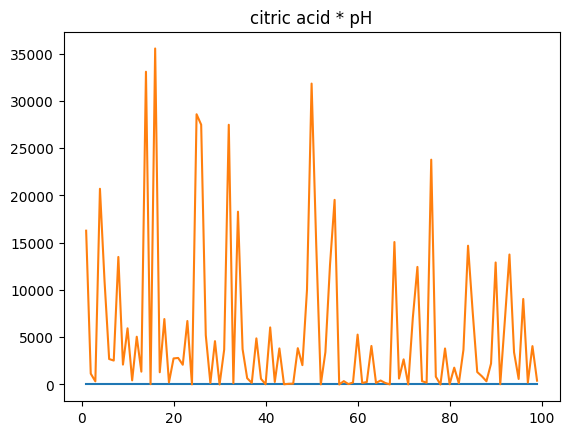

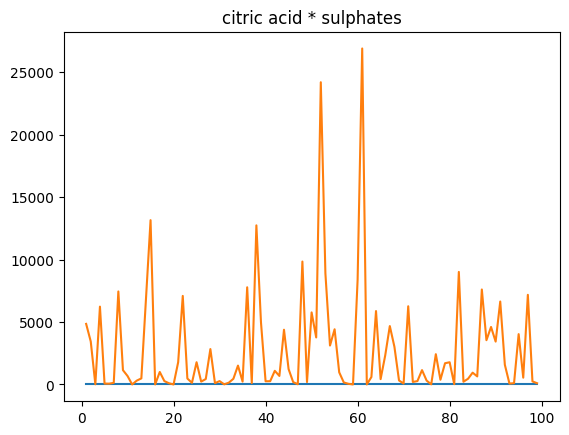

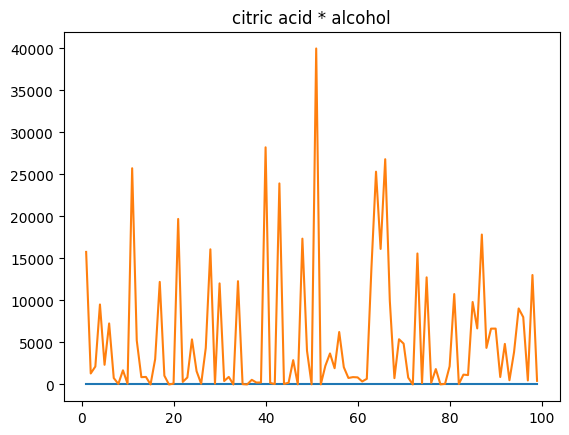

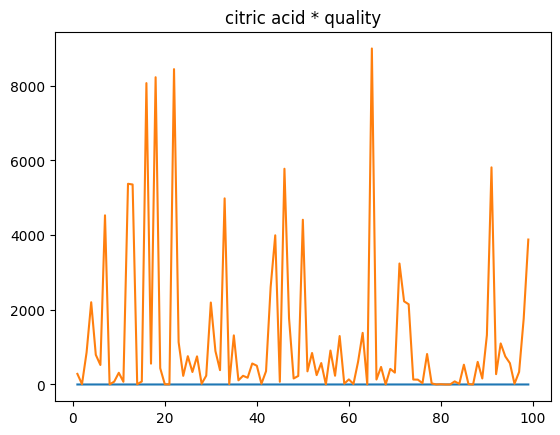

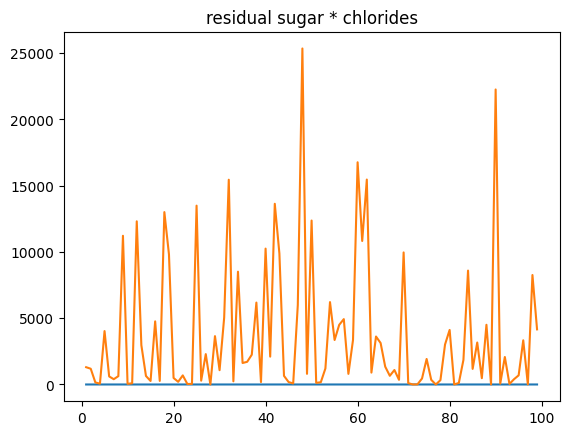

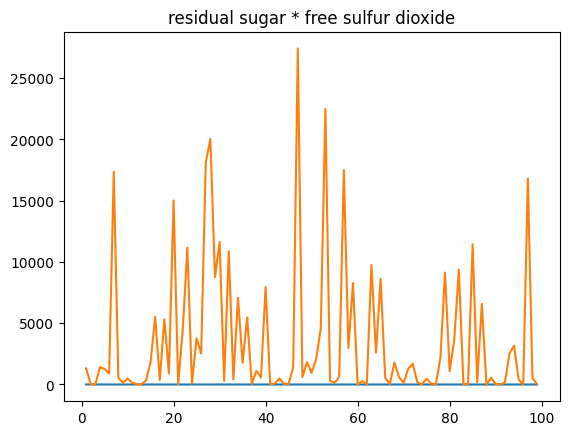

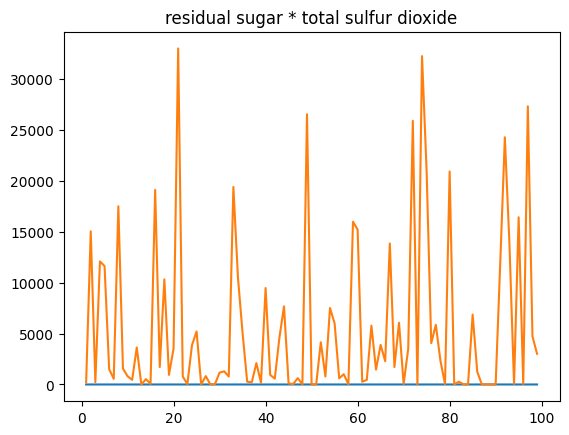

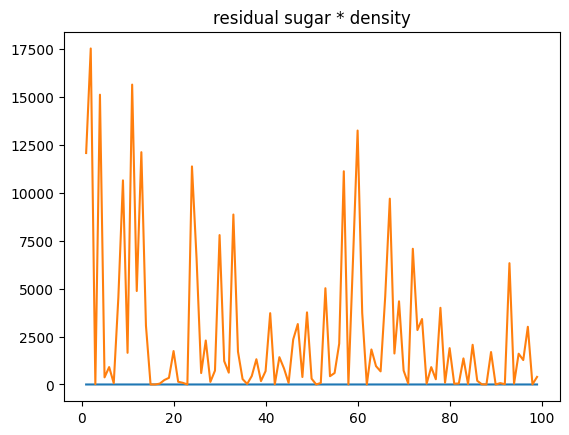

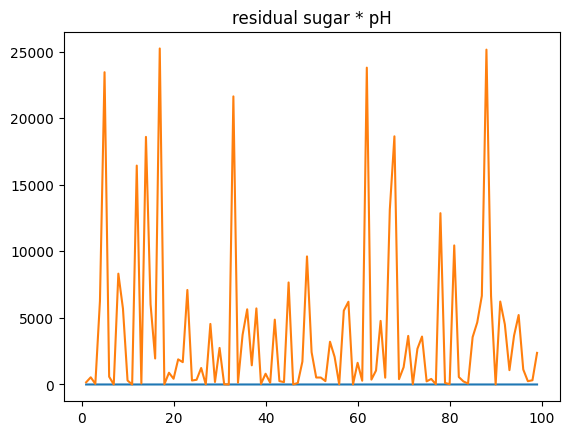

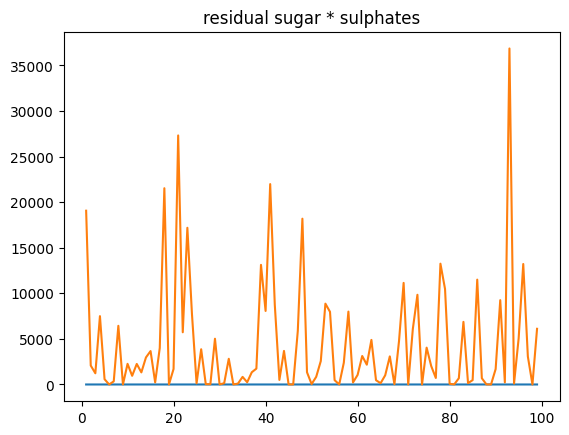

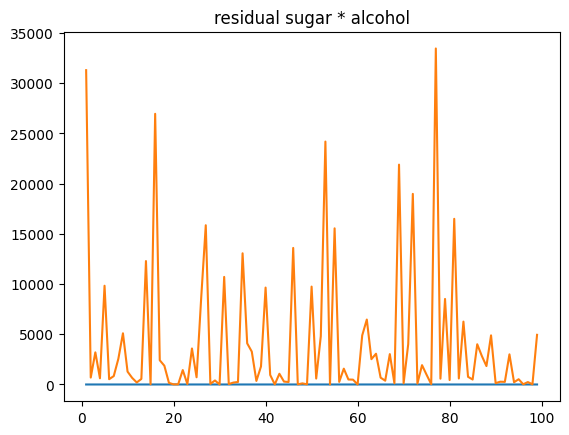

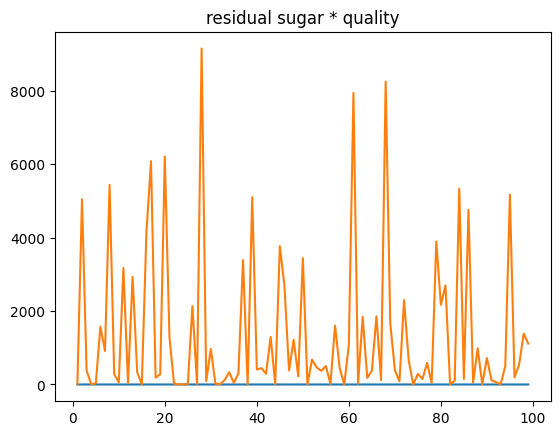

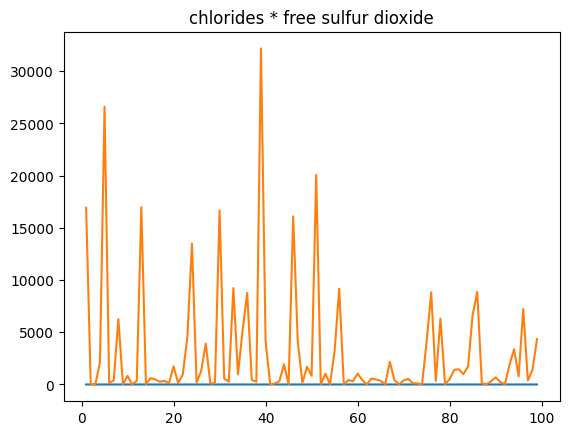

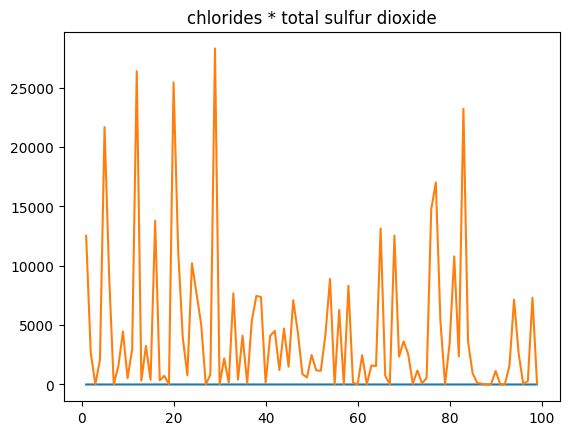

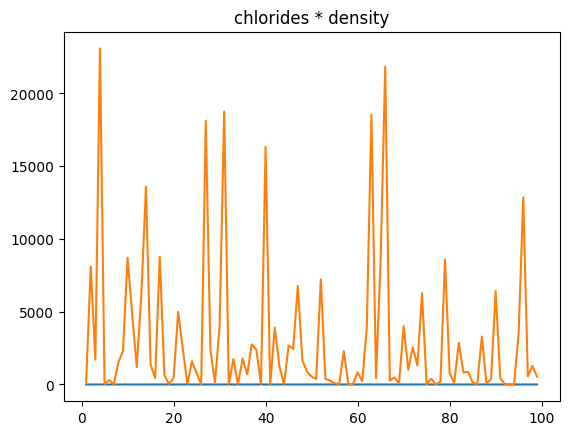

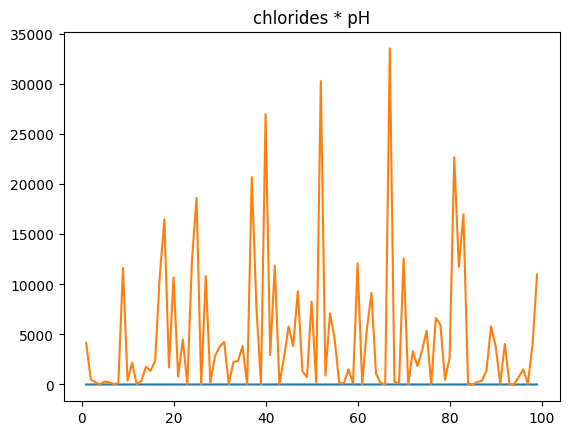

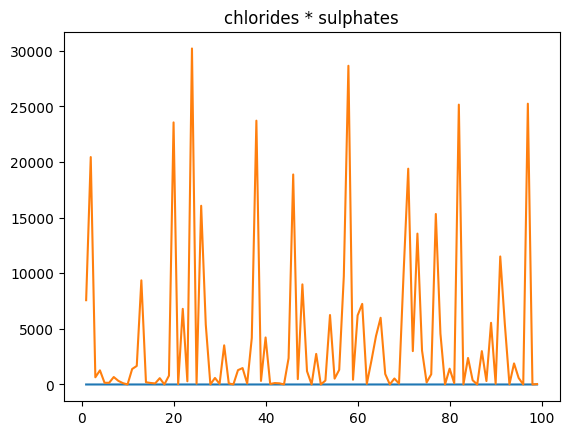

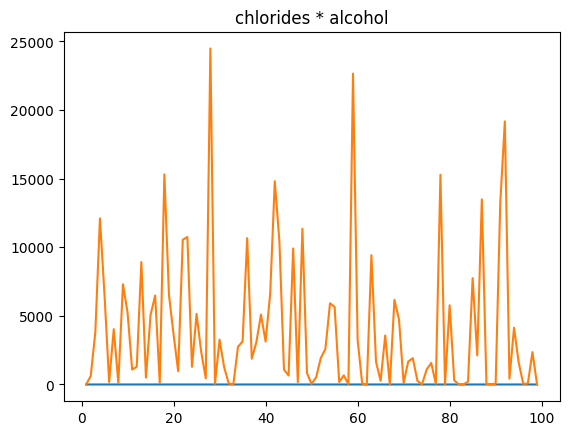

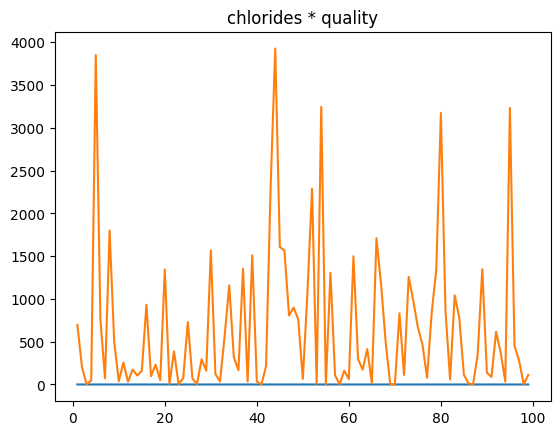

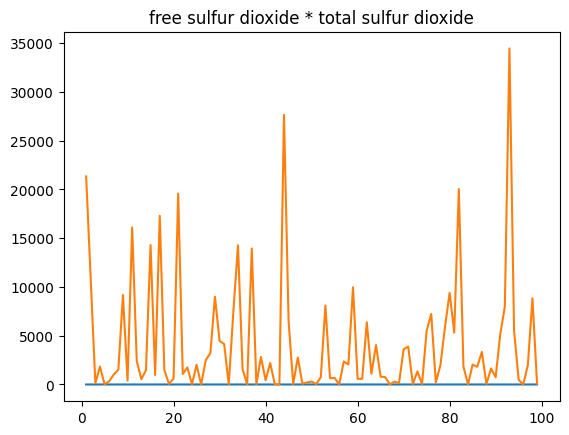

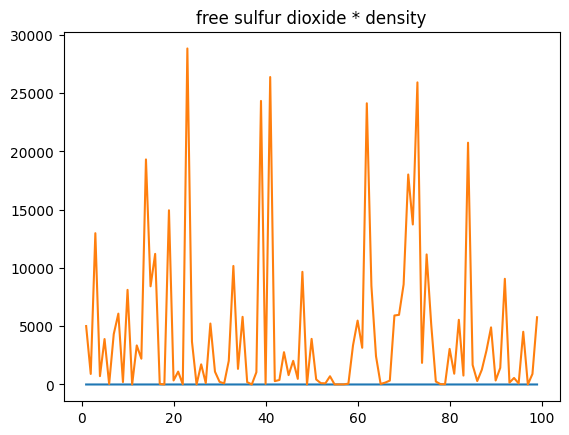

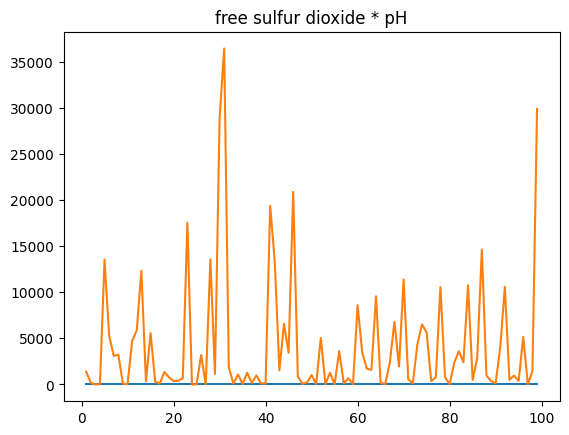

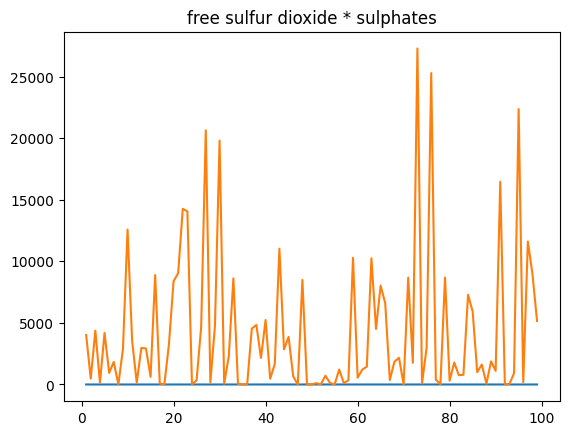

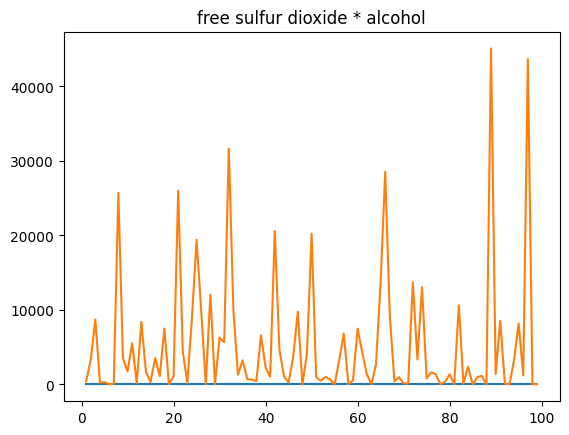

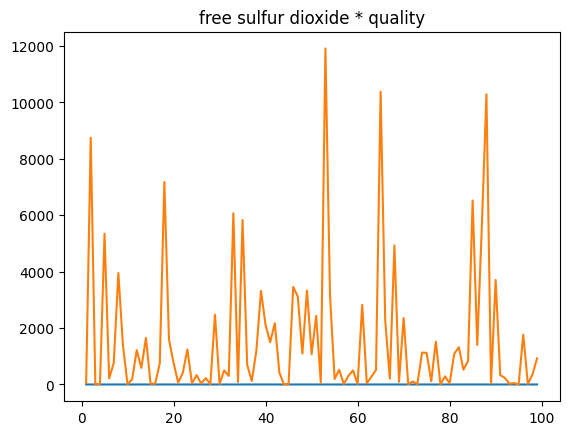

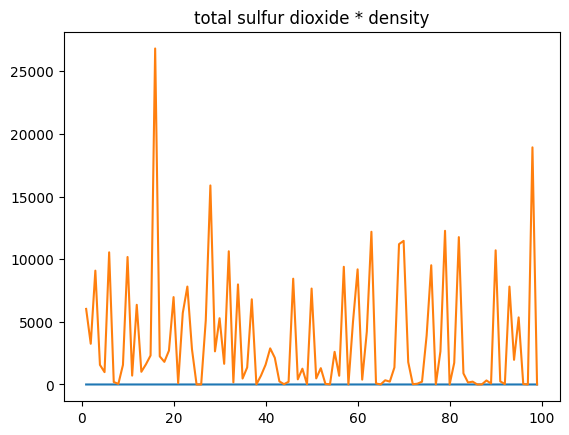

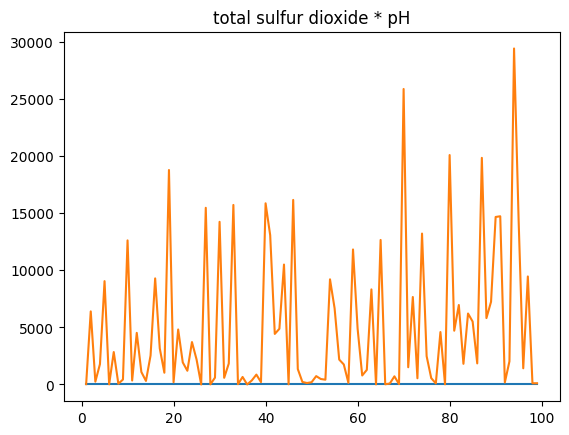

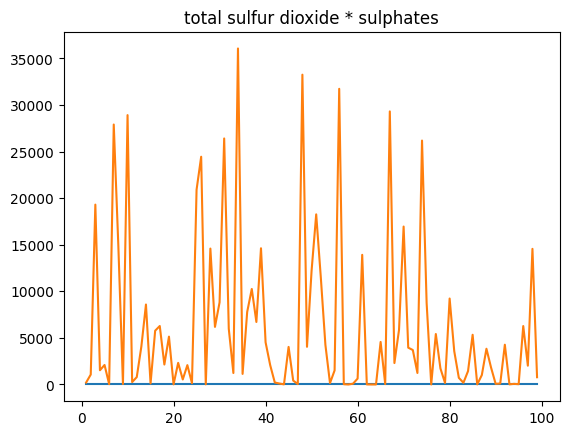

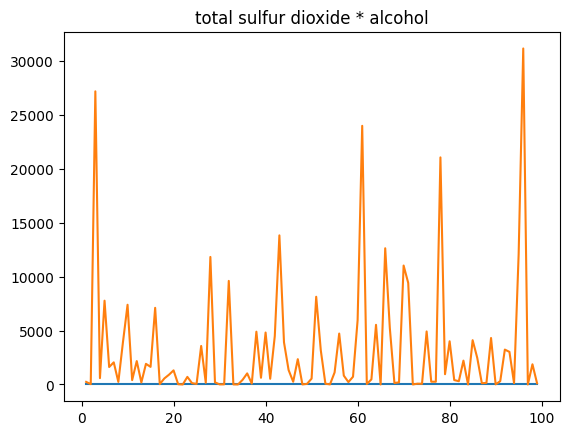

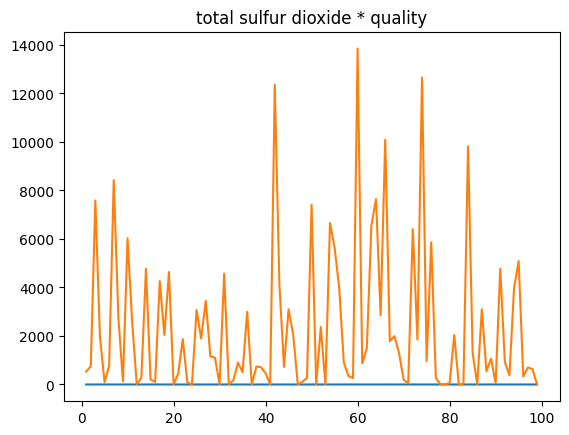

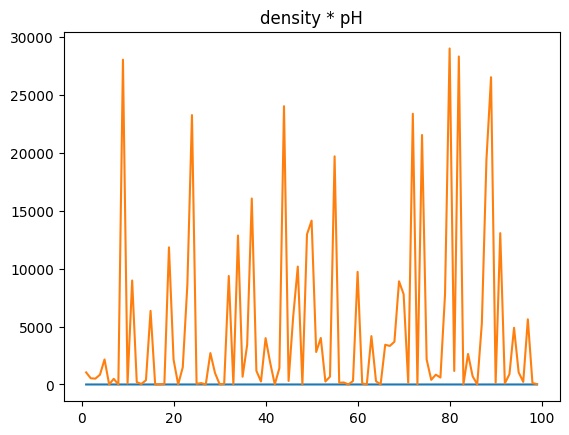

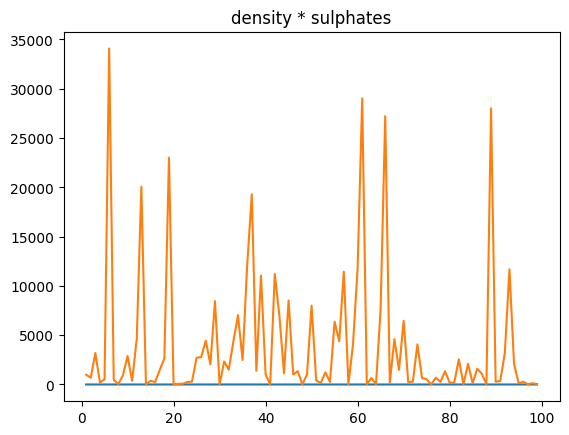

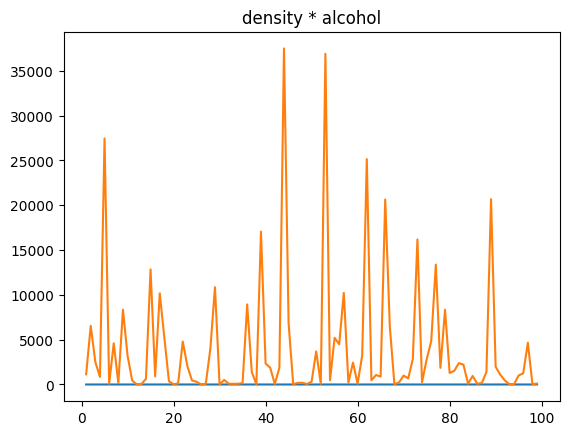

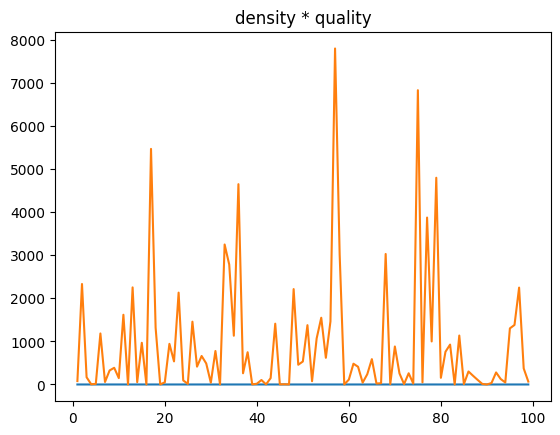

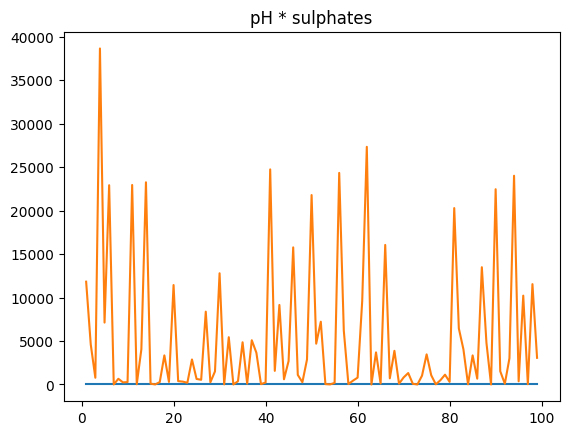

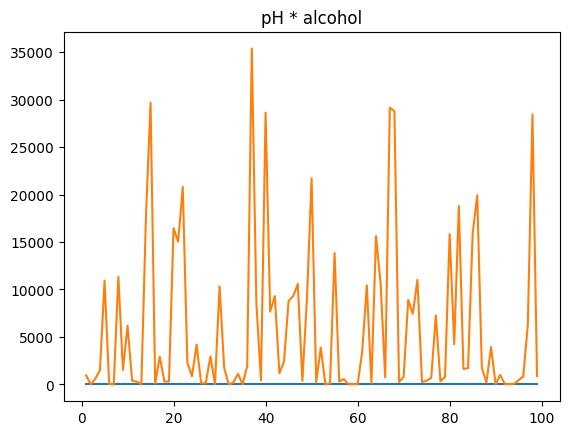

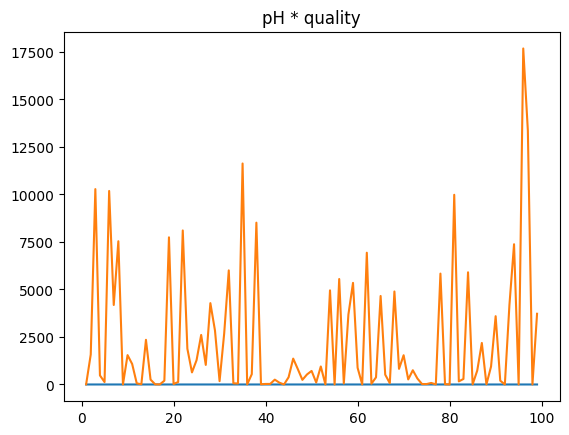

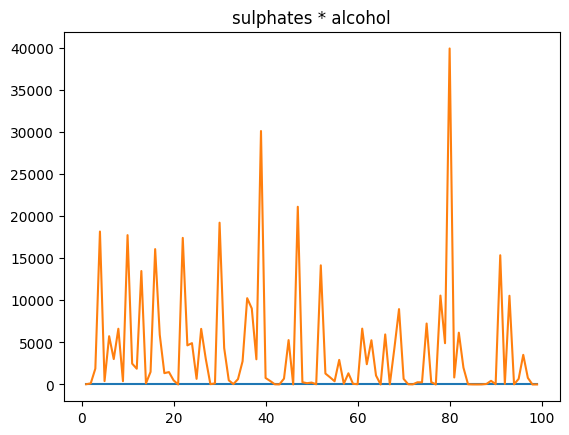

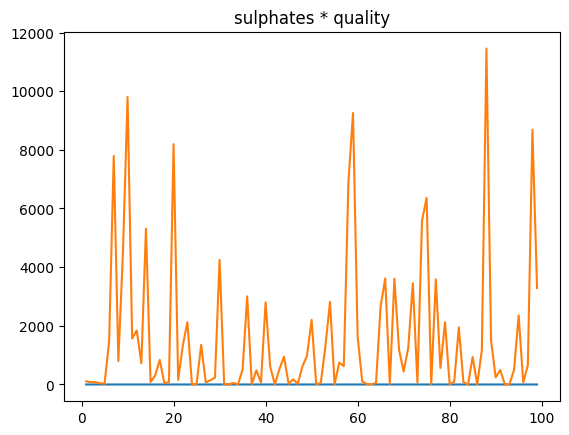

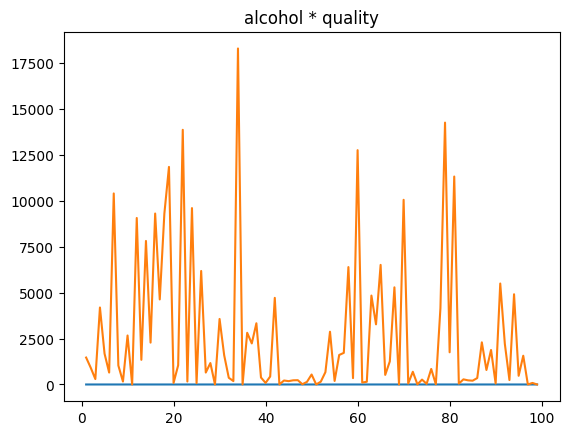

In [7]:
y1 = []
y2 = []
groups = []
mse_hist = []
mse_sketch = []
cnt = 0
for i in range(data.shape[0]):
    if (i == 0) or (data.iloc[i, 0] == data.iloc[i - 1, 0]):
        y1.append(data.iloc[i, 1])
        y2.append(data.iloc[i, 2])
        cnt = cnt + 1
    else:
        plt.title(data.iloc[i - 1, 0])
        plt.plot(range(1, cnt + 1), y1, label="2D Histogram")
        plt.plot(range(1, cnt + 1), y2, label="CM Sketch")
        plt.show()
        groups.append(data.iloc[i - 1, 0])
        mse_hist.append(sum(y1) / len(y1))
        mse_sketch.append(sum(y2) / len(y2))
        y1 = []
        y2 = []
        cnt = 0

plt.title(data.iloc[i - 1, 0])
plt.plot(range(1, cnt + 1), y1, label="2D Histogram")
plt.plot(range(1, cnt + 1), y2, label="CM Sketch")
plt.show()
groups.append(data.iloc[i - 1, 0])
mse_hist.append(sum(y1) / len(y1))
mse_sketch.append(sum(y2) / len(y2))
y1 = []
y2 = []
cnt = 0

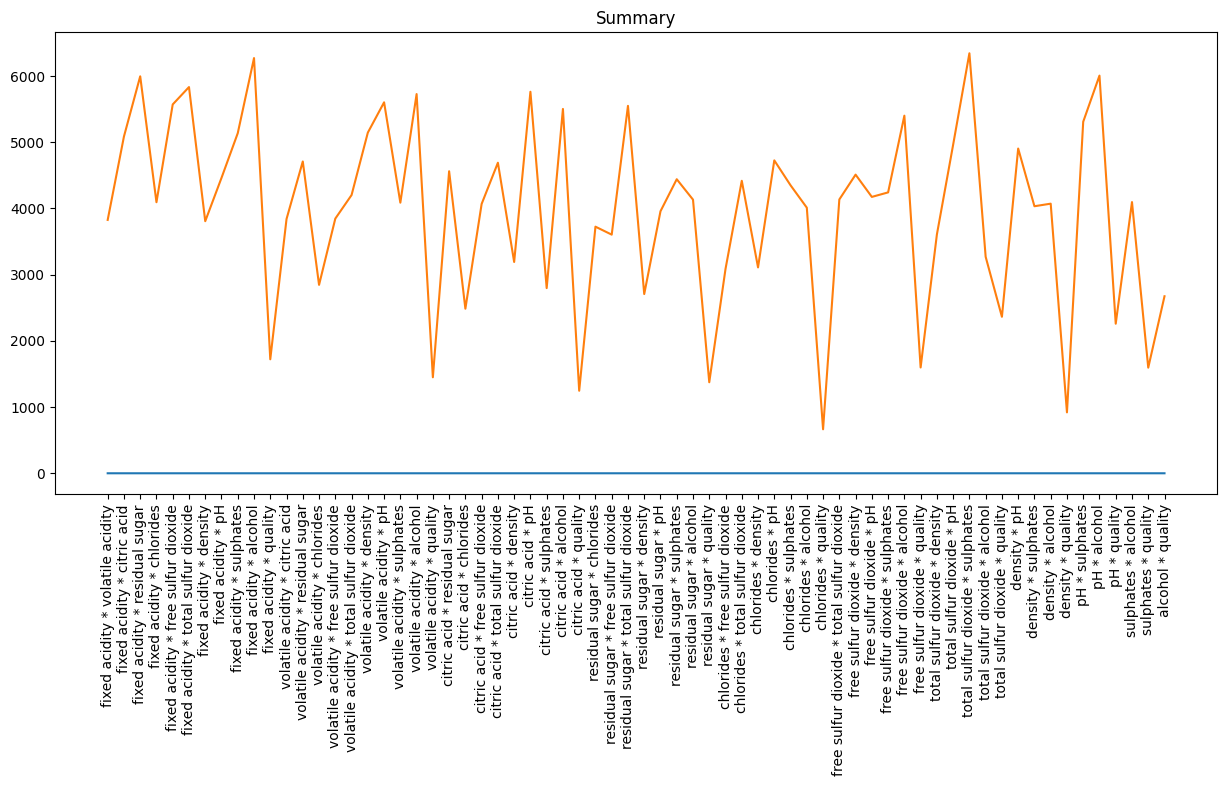

In [8]:
plt.figure(figsize=(15, 6))
plt.title("Summary")
plt.xticks(rotation=90)
plt.plot(groups, mse_hist, label="2D Histogram")
plt.plot(groups, mse_sketch, label="CM Sketch")
plt.show()

## Result

Similar experiments implies that using the same size of memory as the histogram also implies great loss. We discover that the width of the counter make significant contribution to error.